In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np

base_dir = "./processed-data/"

currents = np.load(base_dir + "currents.npz", allow_pickle=True)['currents']
timestamps = np.load(base_dir + "timestamps.npz", allow_pickle=True)['timestamps']
total_coordinates = np.load(base_dir + "total_coordinates.npz", allow_pickle=True)['total_coordinates']
river_heights = np.load(base_dir + "river_heights.npz", allow_pickle=True)['river_heights']

currents.shape, timestamps.shape, total_coordinates.shape, river_heights.shape

((17535, 2, 74, 93), (17535,), (6882, 2), (17535,))

currents[69].shape: (2, 74, 93)
total_coordinates.shape: (6882, 2)


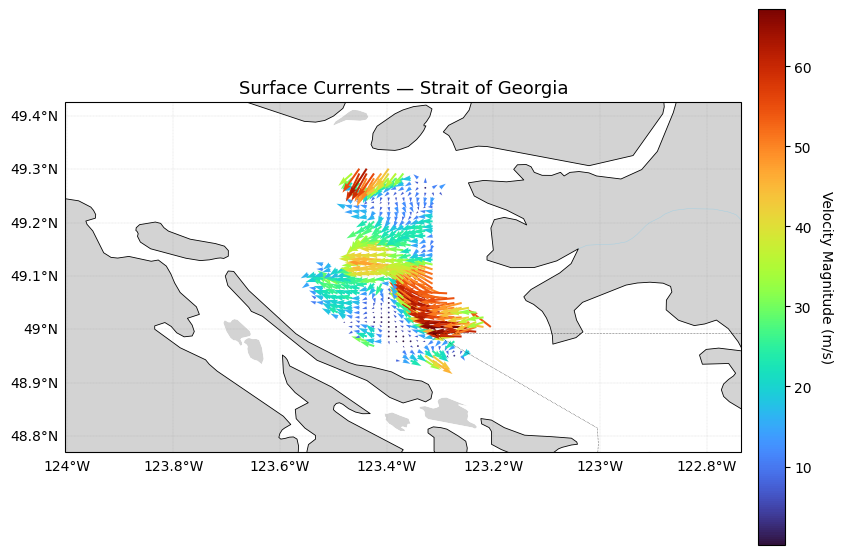

3.57890347943388


In [5]:
from plot_utils import *

print("currents[69].shape:", currents[69].shape)
print("total_coordinates.shape:", total_coordinates.shape)

plot_surface_currents(currents[500], total_coordinates, step=1, scale=1000, width=0.003)
print(river_heights[500])


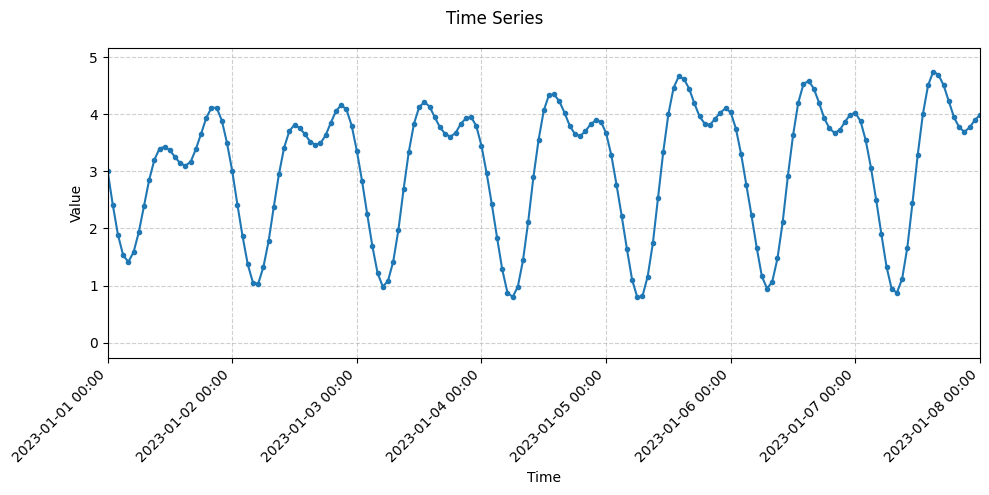

4.11607817243651


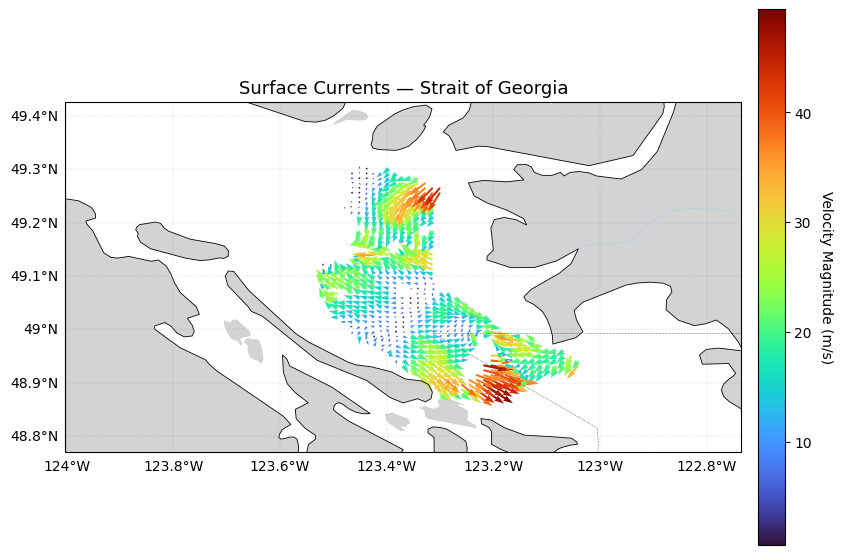

1.03214372181912


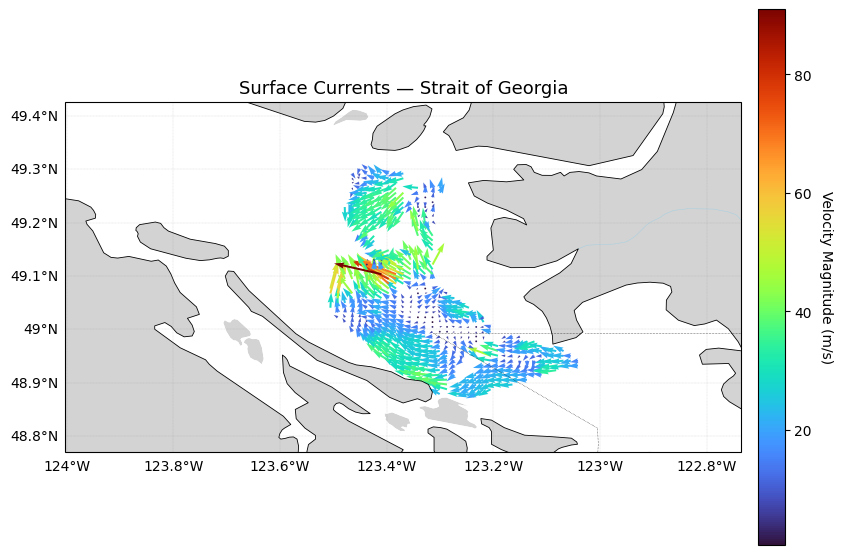

In [6]:
from datetime import datetime

plot_timeseries(timestamps, river_heights, start=datetime(2023, 1, 1), end=datetime(2023, 1, 8))

print(river_heights[21]) # seems like a high value
plot_surface_currents(currents[21], total_coordinates, step=1, scale=1000, width=0.003)

print(river_heights[29]) # seems like a low value
plot_surface_currents(currents[29], total_coordinates, step=1, scale=1000, width=0.003)


3.70619288385608


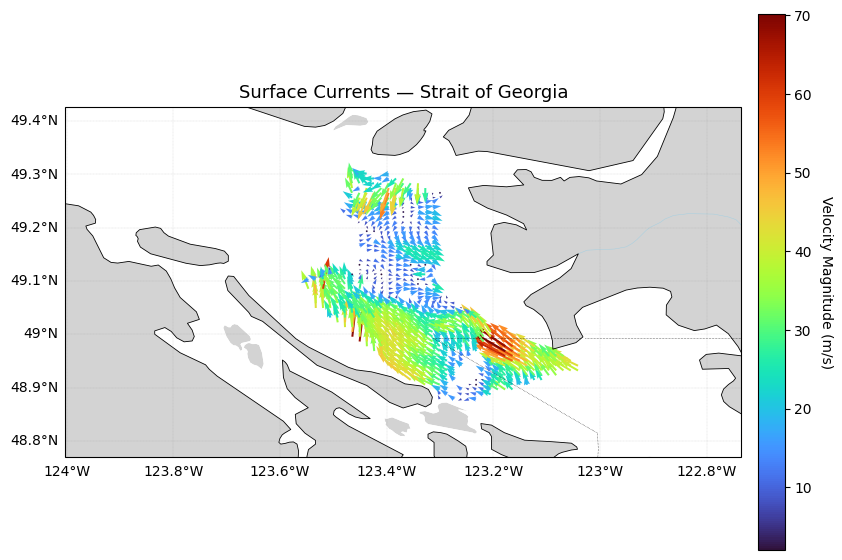

In [54]:
n=35

print(river_heights[n])
plot_surface_currents(currents[n], total_coordinates, step=1, scale=1000, width=0.003)

In [8]:
np.min(total_coordinates[:, 0]), np.max(total_coordinates[:, 0]), np.min(total_coordinates[:, 1]), np.max(total_coordinates[:, 1])

(np.float64(-124.0029726),
 np.float64(-122.7348151),
 np.float64(48.769047),
 np.float64(49.427157))

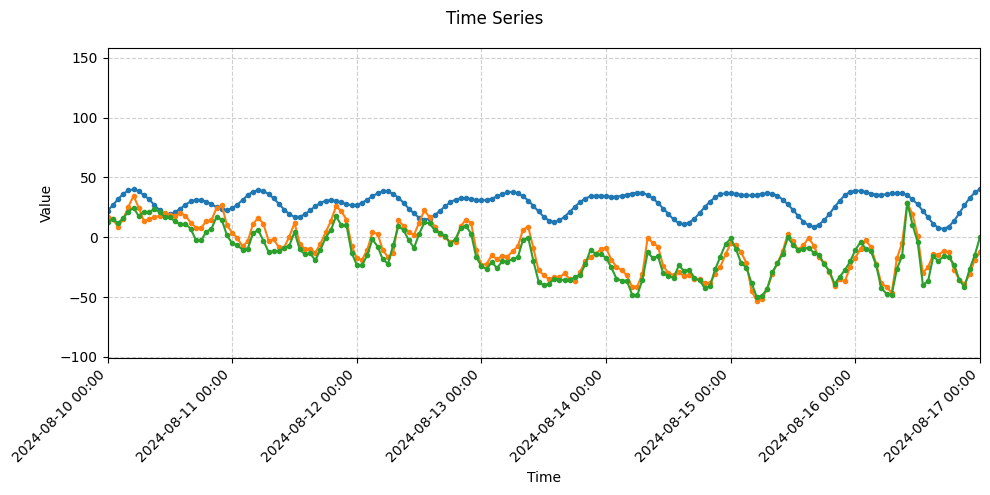

In [66]:
p1 = [28, 50]
p2 = [29, 49] # pick points near the river

U_p1 = currents[:, 0, p1[0], p1[1]]
V_p1 = currents[:, 1, p1[0], p1[1]]

U_p2 = currents[:, 0, p2[0], p2[1]]
V_p2 = currents[:, 1, p2[0], p2[1]]

plot_timeseries(
    timestamps,
    river_heights * 10, # just eyeball scaling, nothing fancy.
    U_p1,
    U_p2,
    # np.sqrt(np.square(U_p1) + np.square(U_p2)),
    start=datetime(2024, 8, 10),
    end=datetime(2024, 8, 17) # plot a random segment of time
)